<a href="https://colab.research.google.com/github/caterinagallardo/challenge-1-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp

#1. Análisis de facturación



In [ ]:
# Variable Global
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

In [ ]:
suma_precios_tienda = []
for tienda in tiendas:
  suma_precios_tienda.append(tienda['Precio'].sum())

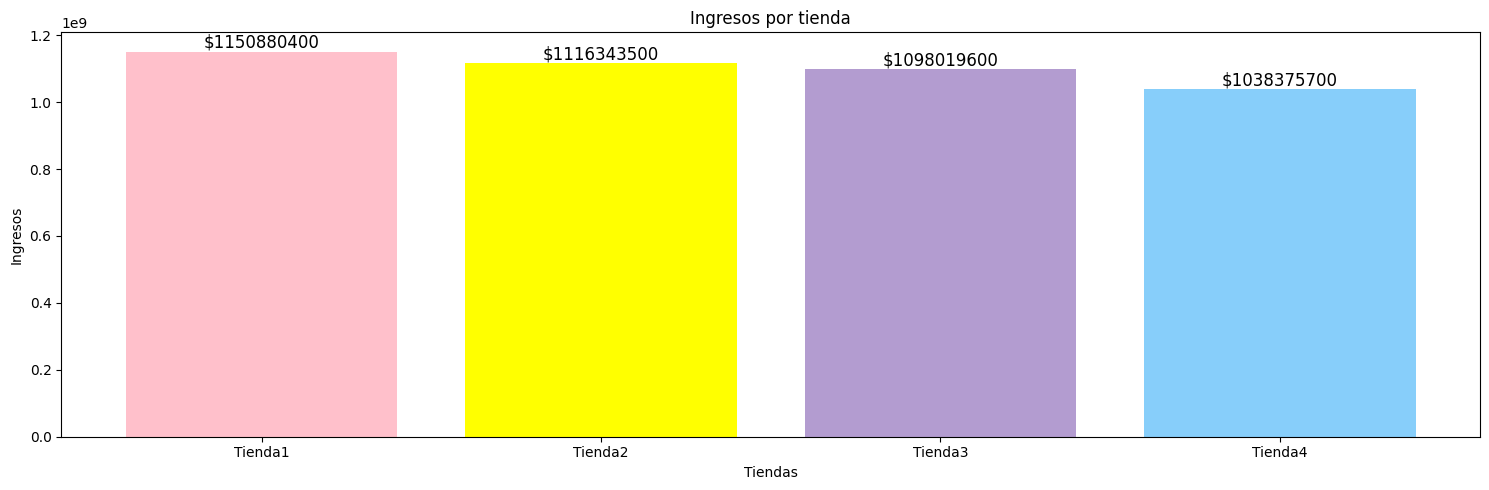

In [ ]:
def ingresosTiendas(nombres, suma_precios_tienda):
  plt.figure(figsize=(15,5))
  colors = ['pink', 'yellow', '#B39CD0', 'lightskyblue']
  bars = plt.bar(nombres, suma_precios_tienda, color=colors)

  plt.xlabel('Tiendas')
  plt.ylabel('Ingresos')
  plt.title('Ingresos por tienda')

  for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 1000,
             f'${int(yval)}',
             ha='center',
             va='bottom',
             fontsize = 12
    )

  plt.tight_layout()
  plt.show()

ingresosTiendas(nombres, suma_precios_tienda)

# 2. Ventas por categoría

In [ ]:
def categorias_tiendas(tiendas):
  categorias = {}
  for tienda in tiendas:
    for categoria in tienda['Categoría del Producto']:
      if categoria in categorias:
        categorias[categoria] += 1
      else:
        categorias[categoria] = 1
  return categorias

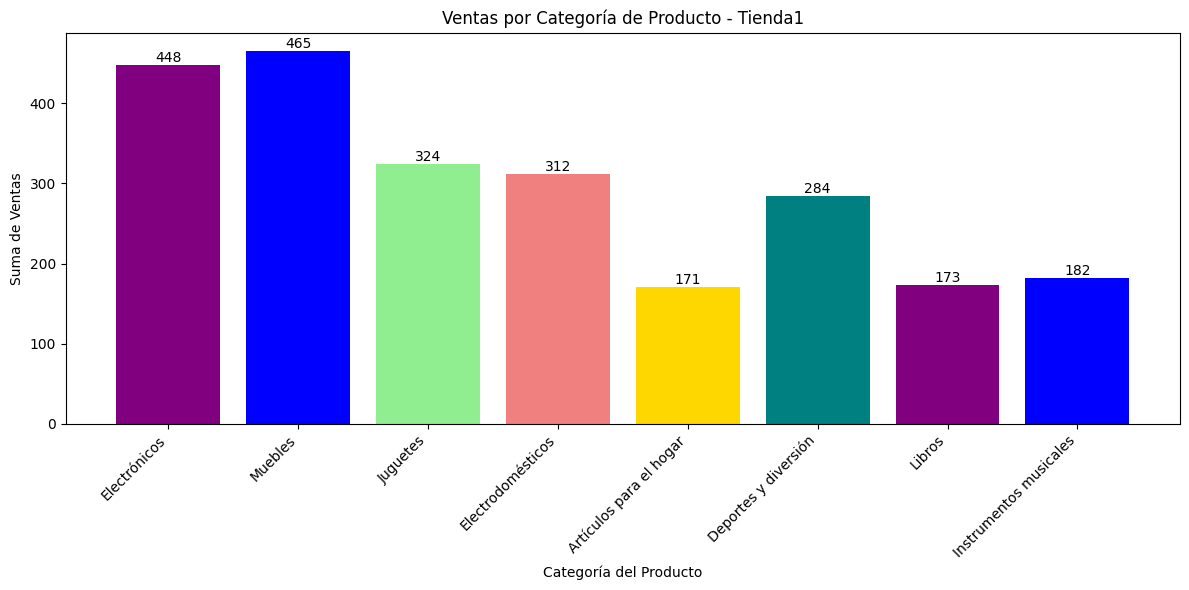

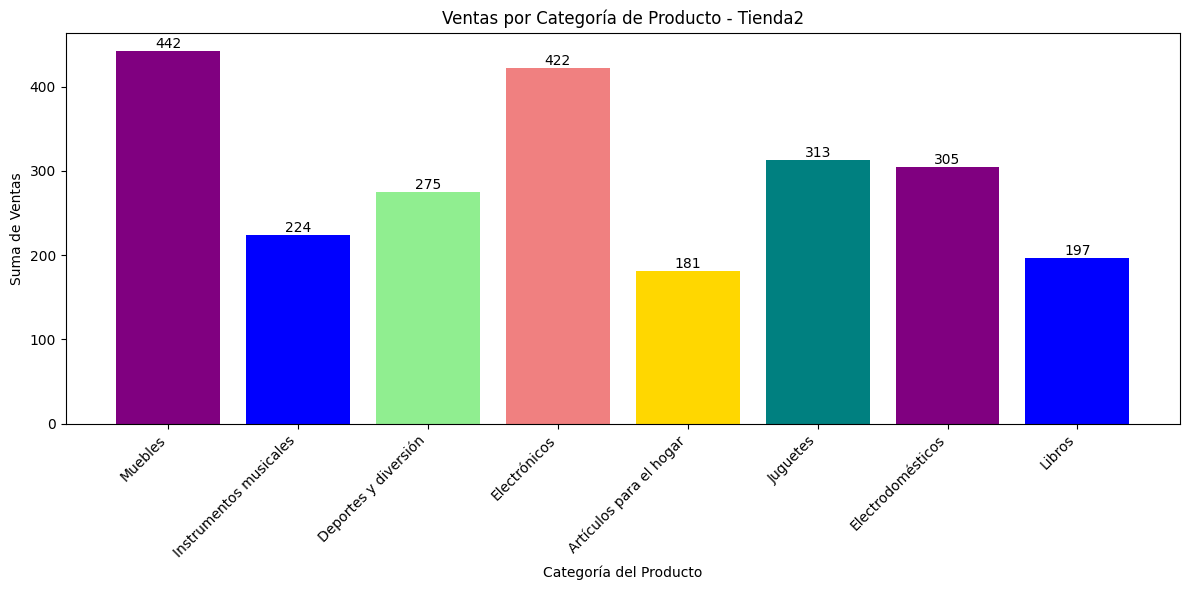

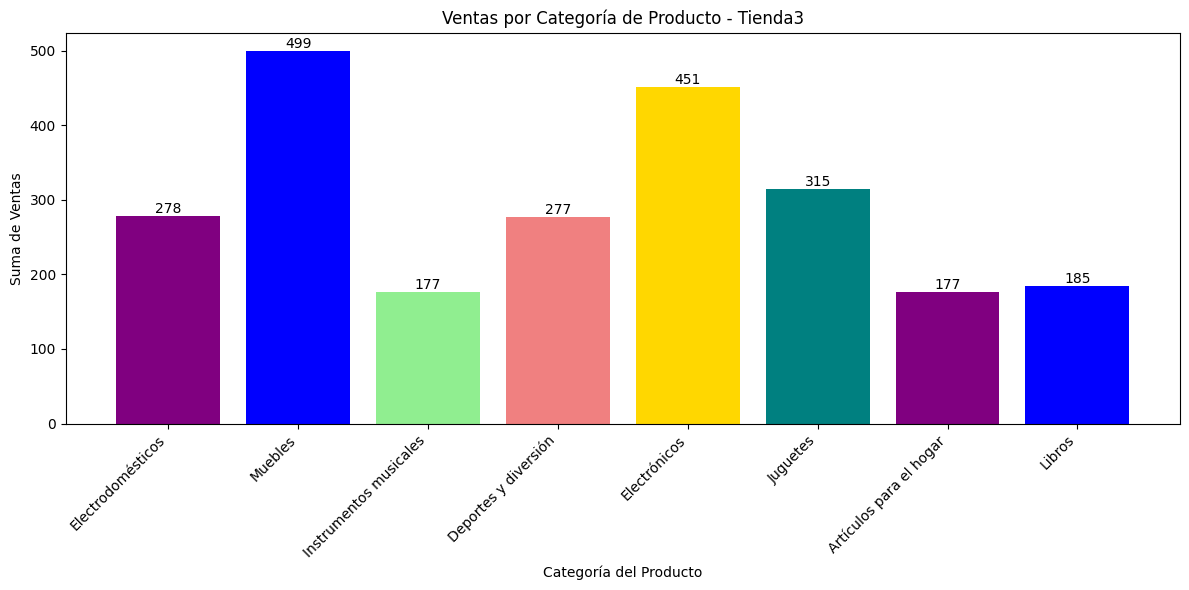

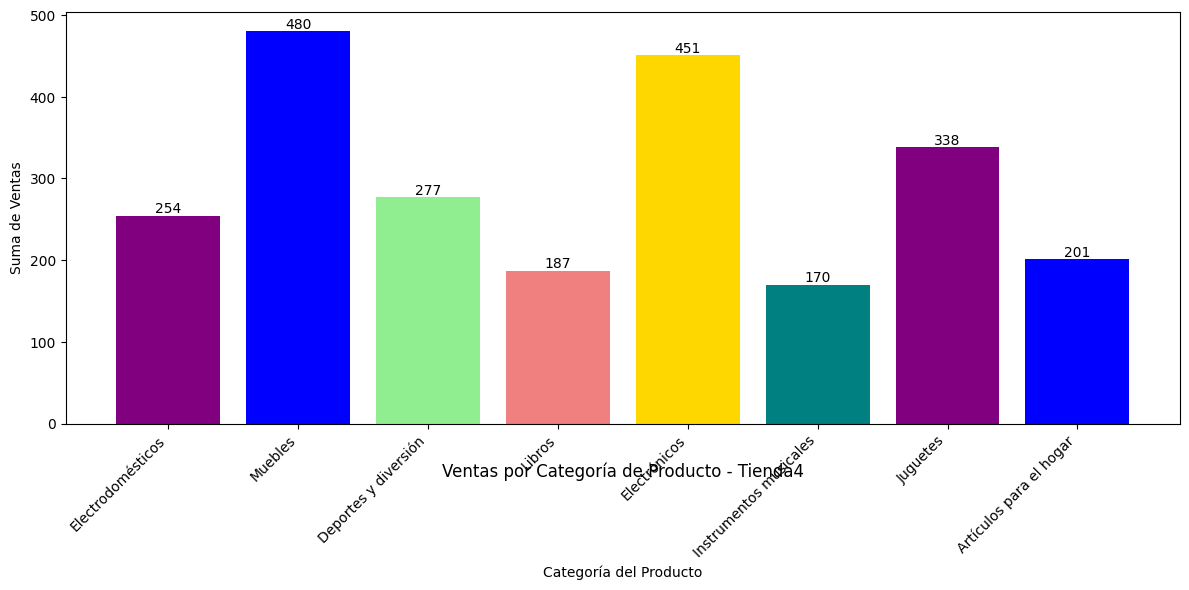

In [ ]:
def plot_categorias_por_tienda(tiendas, nombres):
  for i in range(len(tiendas)):
    tienda = tiendas[i]
    nombre_tienda = nombres[i]

    categorias_tienda = {}
    for categoria in tienda['Categoría del Producto']:
      if categoria in categorias_tienda:
        categorias_tienda[categoria] += 1
      else:
        categorias_tienda[categoria] = 1

    plt.figure(figsize = (12, 6))
    colores = ['purple', 'blue', 'lightgreen', 'lightcoral', 'gold', 'teal']
    bars = plt.bar(categorias_tienda.keys(), categorias_tienda.values(), color = colores[:len(categorias_tienda)])

    plt.xlabel('Categoría del Producto')
    plt.ylabel('Suma de Ventas')


    title = f'Ventas por Categoría de Producto - {nombre_tienda}'
    if nombre_tienda == 'Tienda4':
        plt.title(title, loc='center', y=-0.15)
    elif nombre_tienda == 'Tienda2':
        plt.title(title, loc='center')
    else:
        plt.title(title, loc='center')

    plt.xticks(rotation = 45, ha='right')


    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


plot_categorias_por_tienda(tiendas, nombres)

In [ ]:
lista_categorias = categorias_tiendas(tiendas)

# 3. Calificación promedio de la tienda


In [ ]:
def valoracion_promedio(tienda):
  promedio = round(tienda['Valoración'].sum()/len(tienda), 2)
  return promedio

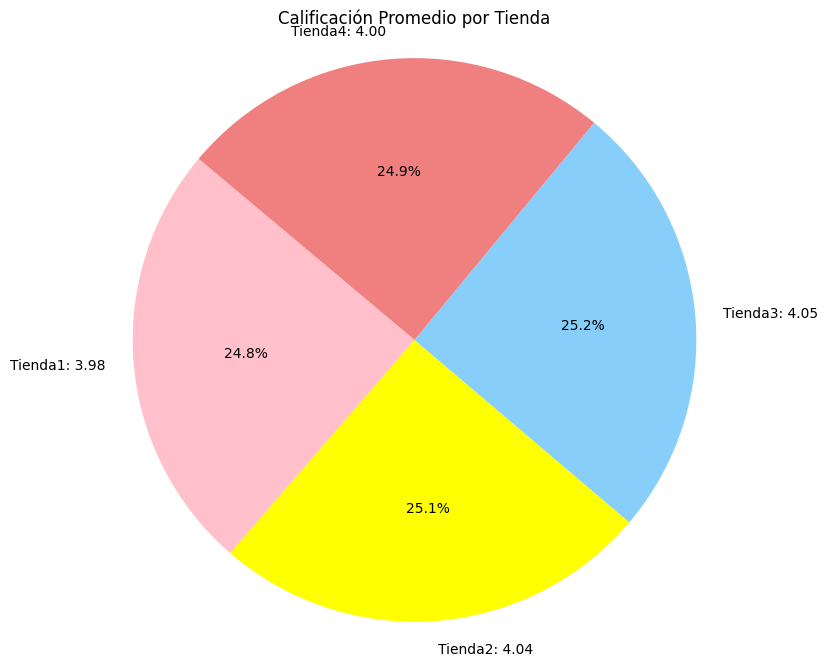

In [ ]:
def valoracion_promedio(tienda):
  if 'Calificación' in tienda.columns:
    tienda['Calificación'] = pd.to_numeric(tienda['Calificación'], errors='coerce')
    promedio = round(tienda['Calificación'].dropna().mean(), 2)
  else:
    promedio = 0
  return promedio


valores = [valoracion_promedio(tienda) for tienda in tiendas]

plt.figure(figsize=(8, 8))
colors = ['pink', 'yellow', 'lightskyblue', 'lightcoral']


labels = [f'{nombres[i]}: {valores[i]:.2f}' for i in range(len(nombres))]

plt.pie(valores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Calificación Promedio por Tienda')
plt.axis('equal')

plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def mayor_y_menor(tienda):
  productos = {}
  for index, row in tienda.iterrows():
    producto = row['Producto']

    if producto in productos:
      productos[producto] +=1
    else:
      productos[producto] = 1
  productos_ordenados = dict(sorted(productos.items(), key=lambda item: item[1], reverse=True))
  mas_vendidos = next(iter(productos_ordenados.items()))
  menos_vendidos = list(productos_ordenados.items())[-1]
  return mas_vendidos, menos_vendidos, productos_ordenados

In [ ]:
def mostrar_mas_y_menos_vendidos(tienda, nombre_tienda):
  mas_vendidos, menos_vendidos, productos_ordenados = mayor_y_menor(tienda)

  productos = [mas_vendidos[0], menos_vendidos[0]]
  cantidades = [mas_vendidos[1], menos_vendidos[1]]

  colores = ['lightgreen', 'lightcoral']

  plt.figure(figsize=(10, 6))
  bars = plt.bar(productos, cantidades, color=colores)

  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)} ventas', ha= 'center', va= 'bottom')

  plt.ylabel('Cantidad de Ventas')
  plt.title(f'Productos más y menos vendidos - {nombre_tienda}')
  plt.tight_layout()
  plt.show()

In [ ]:
def mostrar_productos_ordenados(tienda, nombre_tienda):
  _, _, productos_ordenados = mayor_y_menor(tienda)

  productos = list(productos_ordenados.keys())
  cantidades = list(productos_ordenados.values())

  colores = ['lightgreen', 'lightcoral']

  plt.figure(figsize=(12, 6))
  bars = plt.bar(productos, cantidades, color=colores)

  plt.ylabel('Cantidad de Ventas')
  plt.title(f'Productos ordenados por ventas en - {nombre_tienda}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

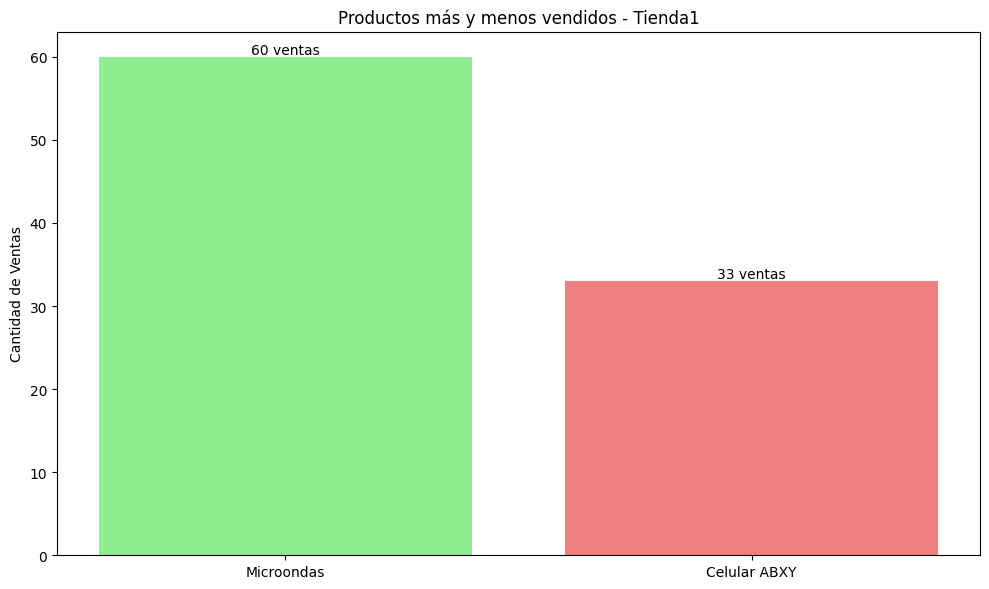

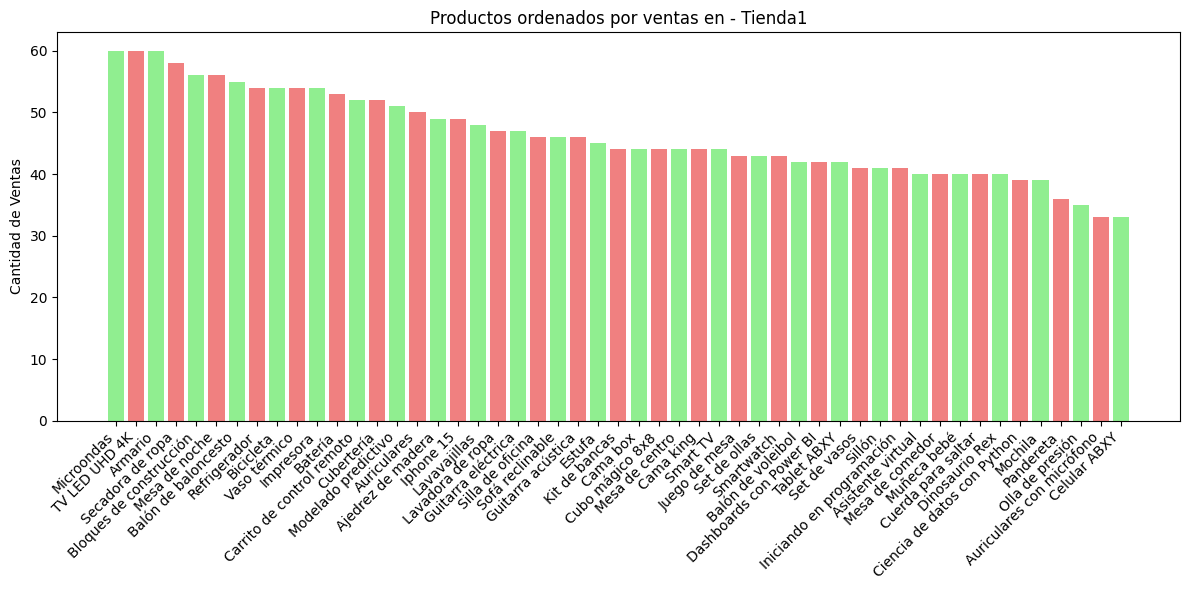

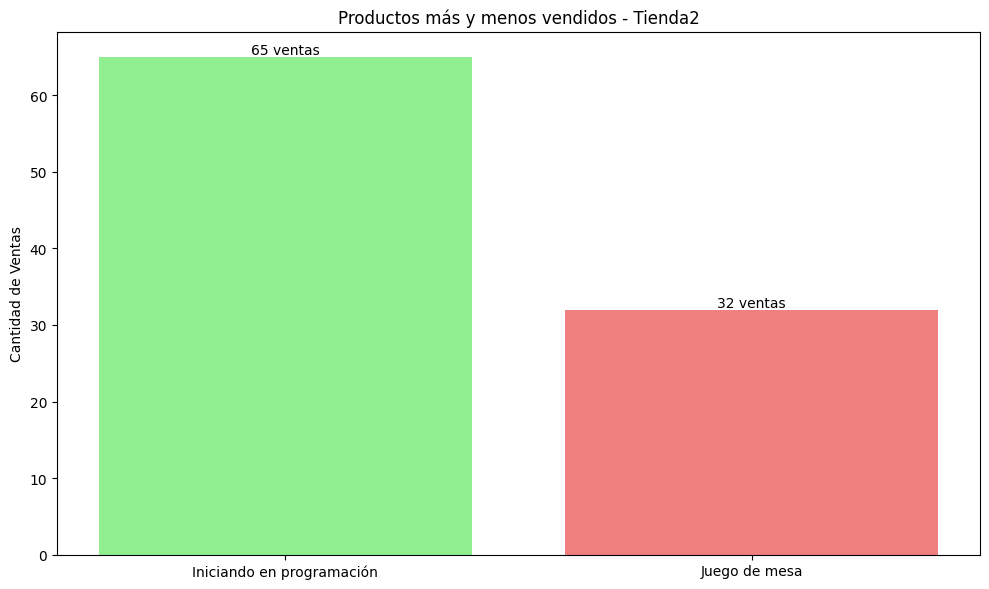

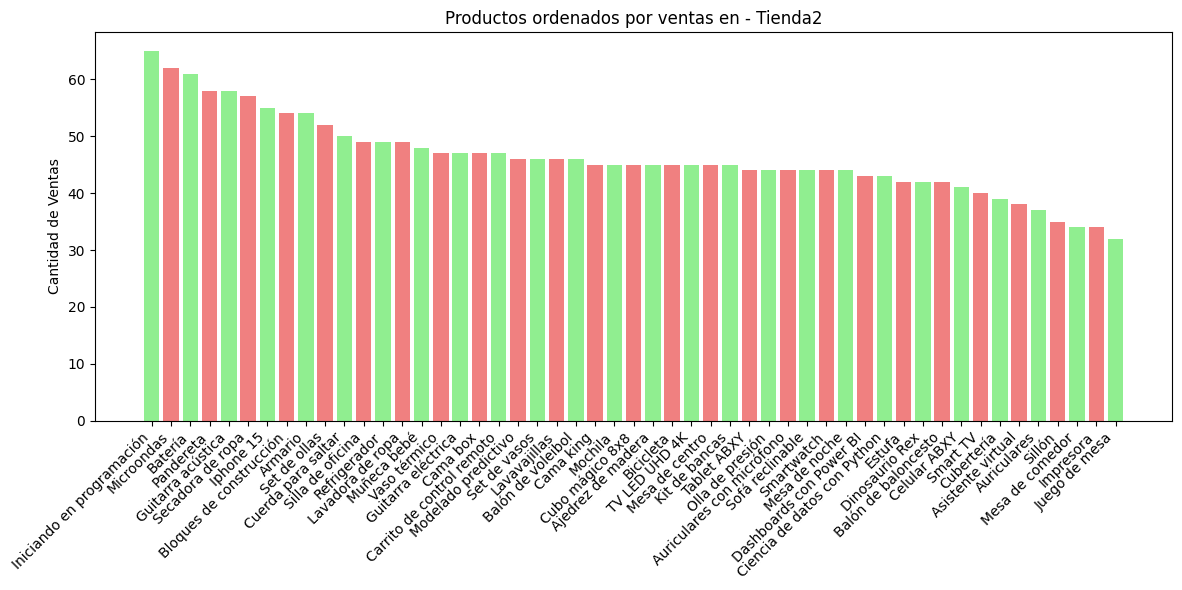

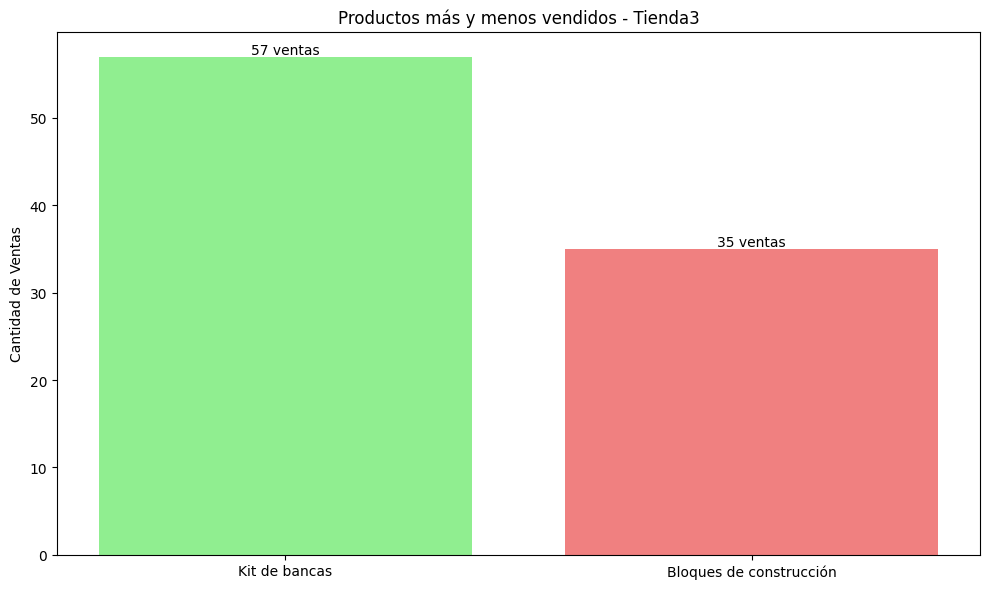

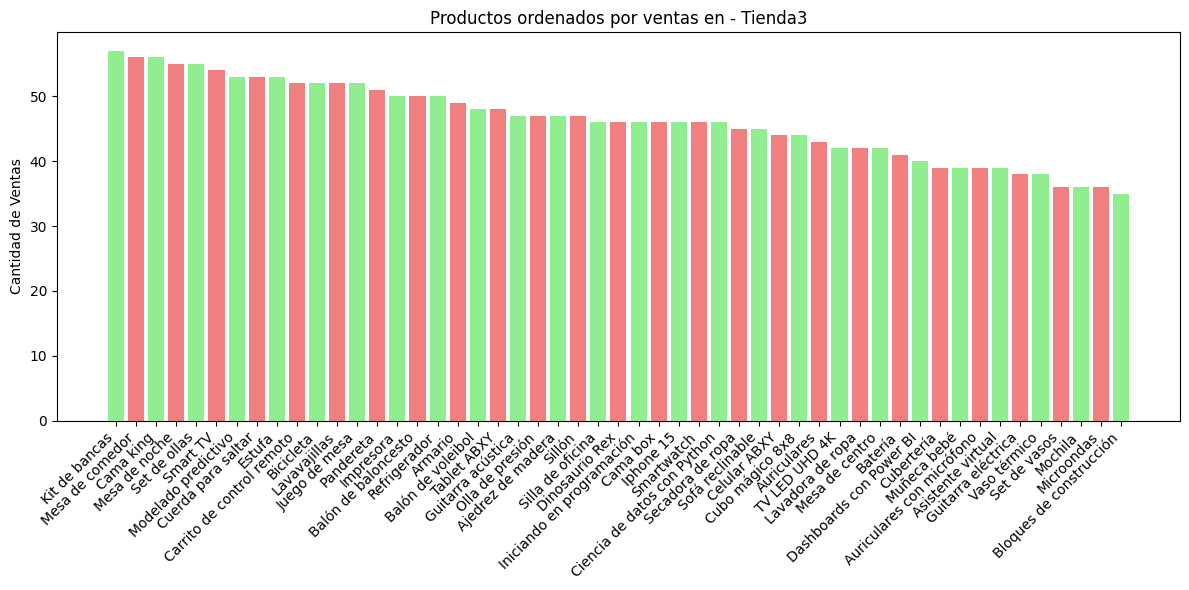

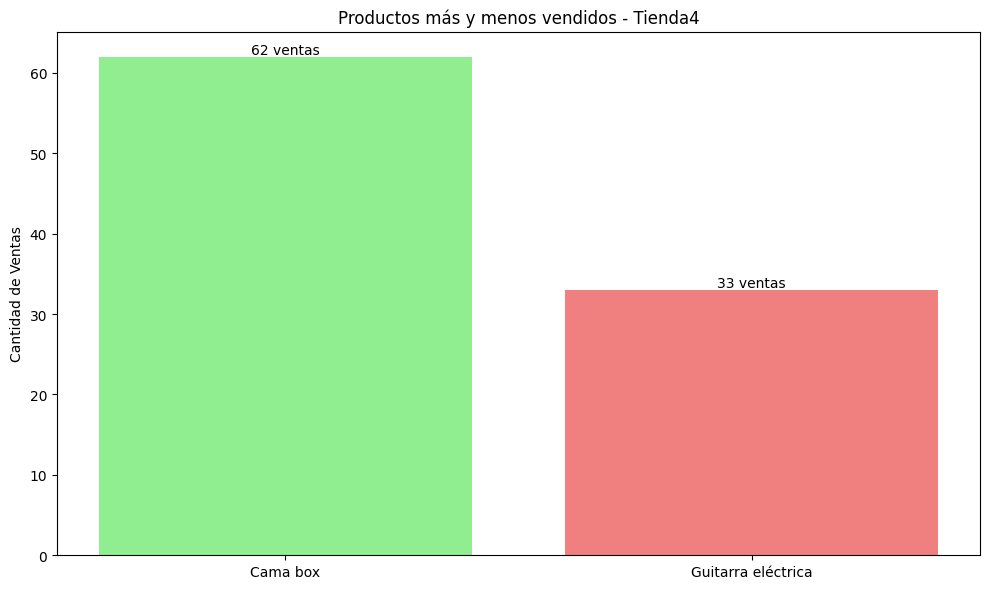

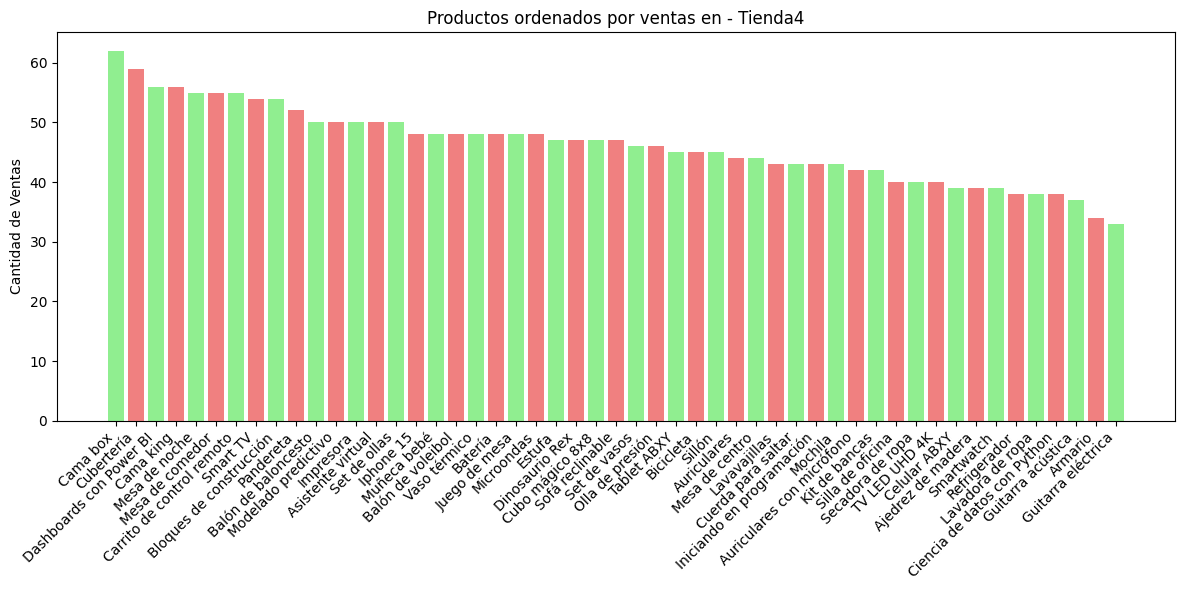

In [ ]:
for i in range(len(tiendas)):
  mostrar_mas_y_menos_vendidos(tiendas[i], nombres[i])
  mostrar_productos_ordenados(tiendas[i], nombres[i])

# 5. Envío promedio por tienda

In [ ]:
def promedio_envio(tienda_df):
  tienda_df['Costo de envío'] = pd.to_numeric(tienda_df['Costo de envío'], errors='coerce')
  promedio = round(tienda_df['Costo de envío'].mean(), 2)
  return float(promedio)

lista_promedios = [promedio_envio(df) for df in tiendas]

In [ ]:
def graficos_promedio_envio(nombres, lista_promedios):
  plt.figure(figsize= (12, 6))
  colors = ['pink', 'yellow', 'lightskyblue', 'lightcoral']

  bars = plt.bar(nombres, lista_promedios, color = colors)

  plt.xlabel('Tiendas')
  plt.ylabel('Costo del Envío')
  plt.title('Promedio de Envíos por Tienda')
  plt.xticks(rotation=45)

  max_val = max(promedio_envio(tienda) for tienda in tiendas)
  plt.ylim(top=max_val + 2000)

  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/ 2,
             height + 500,
             f'${int(height)}',
             ha='center', va='bottom', fontsize = 12
             )

  plt.tight_layout()
  plt.show()

In [ ]:
def graficos_promedio_envio_pie(lista_promedios):
  plt.figure(figsize=(8, 8))
  colores = ['pink', 'yellow', 'green', 'lightcoral']

  plt.pie(lista_promedios, labels=nombres, colors=colores, autopct='%1.1f%%', startangle=90)
  plt.title('Promedio de Envíos por Tienda')
  plt.axis('equal')

  plt.tight_layout()
  plt.show()

In [ ]:
# Variable Global
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

In [ ]:
def promedio_envio(tienda_df):
  tienda_df['Costo de envío'] = pd.to_numeric(tienda_df['Costo de envío'], errors='coerce')
  promedio = round(tienda_df['Costo de envío'].mean(), 2)
  return float(promedio)

lista_promedios = [promedio_envio(df) for df in tiendas]

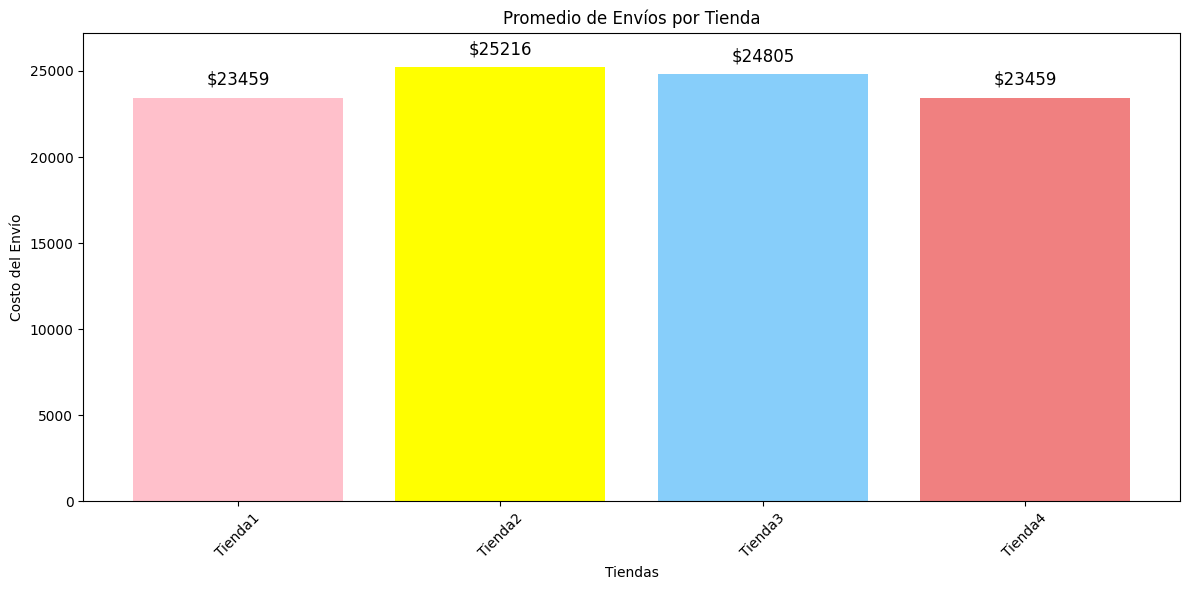

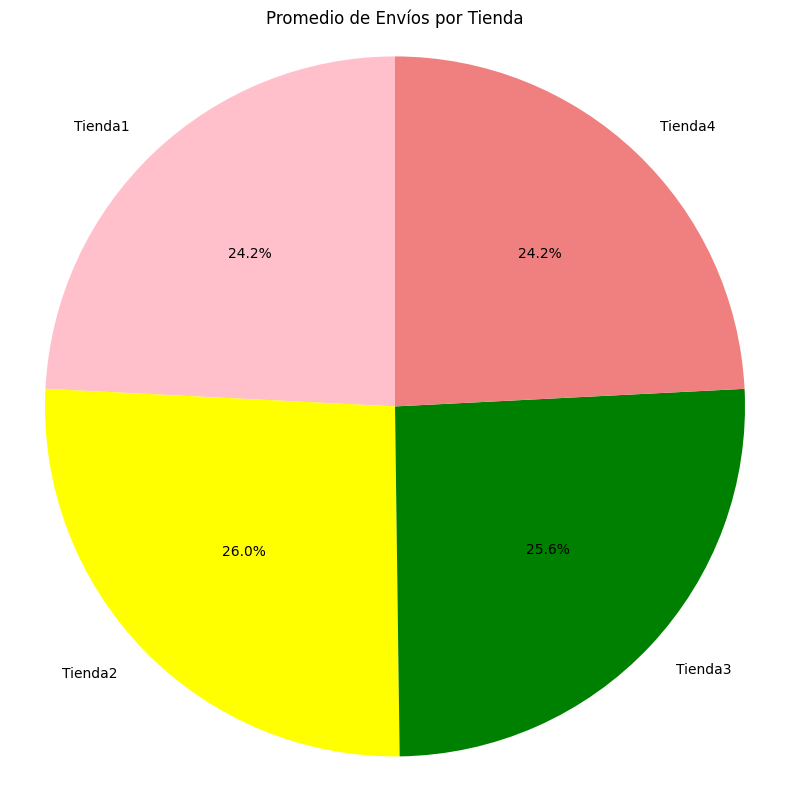

In [ ]:
graficos_promedio_envio(nombres, lista_promedios)
graficos_promedio_envio_pie(lista_promedios)

***# DESARROLLO DEL ANÁLISIS***

Dentro de este resumido desarrollo se puede observar un análisis de cada una de las opciones dadas, por lo cual también se obtendrá una recomendacion de tal observación para el Señor Juan.

#1. INGRESOS TOTALES:
Se ha calculado el ingreso total de cada tienda mediante la suma de todos los productos que han sido vendidos:

Tienda 1: $1.150.880.400

Tienda 2: $1.116.343.500

Tienda 3: $1.098.019.600

Tienda 4: $1.038.375.700



#2. CATEGORÍA DE PRODUCTOS MÁS Y MENOS VENDIDOS:

Se han puesto en revisión las cantidades de productos vendidos por cada categoría en cada una de las tiendas. A continuación, un breve resumen:

Tienda 1:
- Muebles: 465
- Electrónicos: 312
- Juguetes: 324
- Deportes y diversión: 284
- Electrodomésticos: 448
- Instrumentos músicales: 171
- Libros: 173
- Artículos del Hogar: 182

Tienda 2:
- Muebles: 442
- Electrónicos: 422
- Juguetes: 313
- Deportes y diversión: 275
- Electrodomésticos: 305
- Instrumentos músicales: 224
- Libros: 197
- Artículos del Hogar: 181

Tienda 3:
- Muebles: 499
- Electrónicos: 451
- Juguetes: 315
- Deportes y diversión: 277
- Electrodomésticos: 278
- Instrumentos músicales: 177
- Libros: 185
- Articulos del Hogar: 177

Tienda 4:
- Muebles: 480
- Electrónicos: 451
- Juguetes: 338
- Deportes y diversión: 277
- Electrodomésticos: 254
- Instrumentos músicales: 170
- Libros: 187
- Artículos del Hogar: 201




#3. CALIFICACIONES PROMEDIO DE LOS CLIENTES:
El nivel de satisfacción de los clientes de cada Tienda fue:

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 4.00



#4. PRODUCTOS MÁS Y MENOS VENDIDOS:

Tienda 1:
- Más: Microondas (60)
- Menos: Celular ABXY (33)

Tienda 2:
- Más: Inciando en programación (65)
- Menos: Juego de mesa (32)

Tienda 3:
- Más: Kit de bancas (57)
- Menos: Bloques de construcción (35)

Tienda 4:
- Más: Cama box (62)
- Menos: Guitarra eléctrica (33)


#5. COSTO PROMEDIO DE ENVÍOS:

Tienda 1: $23.459

Tienda 2: $25.216

Tienda 3: $24.805

Tienda 4: $23.459



#RECOMENDACIÓN:
Se le recomienda al Sr. Juan eliminar la Tienda 4, ya que es la menos rentable en general. Su punto fuerte si es el bajo coste del envío, aún asi no recompensa sus bajos ingresos, calificación y su ponre desempeño en las categorias que son claves. Además, si mejora la logistica como en la Tienda 1, es posible compensar el coste del envío mas bajo.